In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats
from matplotlib.patches import Rectangle
import seaborn as sns


In [3]:
# import survey data 

data = pd.read_csv('DataSim.csv')

# Hypothesis Testing 

## HP 1: Do people use energy modeling for data analysis with the same frequency as they use it for simulation? 

In [7]:
# deleting extra 0 in Q10 

Q1016 = data[["Q10","Q16"]]
Q1016 = Q1016[Q1016["Q10"]!=0]

In [8]:
np.corrcoef(Q1016["Q10"], Q1016["Q16"])[0, 1]

0.018270847574312823

In [9]:
Q1016.corr(method='pearson')

,Q10,Q16
Q10,1.000000,0.018271
Q16,0.018271,1.000000


#### Not correlated. People using energy modeling for data analytics may not neccessarily be using it for simulation as well 

## HP 2: Do people finding inaccurate data an issue for data analytics also find it an issue for simulation?



In [30]:
inaccurate = data[["Q12.3", "Q18.1"]]


In [9]:
inaccurate.corr(method='pearson')

,Q12.3,Q18.1
Q12.3,1.000000,-0.050639
Q18.1,-0.050639,1.000000


#### No correlation for inaccurate data between users of data analytics and simulation.

## HP 3: Do people finding inexperience or less training to be an issue for data analytics also think it's an issue for simulation?

In [10]:
inexperience = data[["Q12.4", "Q18.4"]]

In [11]:
inexperience.corr(method='pearson')

,Q12.4,Q18.4
Q12.4,1.000000,0.023209
Q18.4,0.023209,1.000000


#### No correlation for inexperience between users of data analytics and simulation

## HP 4: Do people finding variation in data outputs in data analytics also find it an issue for simulation?

In [12]:
variation = data[["Q12.2", "Q18.2"]]
variation.corr(method='pearson').iloc[0,1]

0.05956617880086332

In [13]:
variation.corr(method='pearson').iloc[0,1]

0.05956617880086332

In [ ]:
# bootstrap sampling for variation correlation

In [14]:
bs_sim = np.random.choice(variation["Q18.2"], len(variation["Q18.2"]), replace = True)

In [15]:
bs_sim

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,

In [16]:
variation["Q12.2"]

0      0
1      0
2      1
3      0
4      0
5      1
6      0
7      0
8      1
9      0
10     0
11     0
12     1
13     0
14     0
15     1
16     1
17     0
18     0
19     0
20     0
21     0
22     1
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
418    1
419    0
420    0
421    0
422    0
423    0
424    0
425    1
426    1
427    1
428    0
429    0
430    0
431    0
432    0
433    0
434    0
435    0
436    1
437    1
438    0
439    1
440    0
441    0
442    0
443    1
444    0
445    1
446    0
447    0
Name: Q12.2, Length: 448, dtype: int64

In [17]:
# creating a list of bootstrap samples, sampling with replacement

bs_corr = []

for i in range (100): 
    bs_sim = np.random.choice(variation["Q18.2"], len(variation["Q18.2"]), replace = True)
    r = np.corrcoef(variation["Q12.2"], bs_sim)[0, 1]
    bs_corr.append(r)                          

In [18]:
bs_corr

[-0.047297144802603226,
 -0.008601763583337812,
 0.05260558393087695,
 0.056449122507210944,
 -0.04394819171945728,
 -0.05559917264572522,
 -0.00033704078193461497,
 0.01051320806763069,
 0.023083108105256194,
 -0.021627109986506392,
 -0.02190206616345057,
 0.08123086499250053,
 -0.010020274179121673,
 0.048445160030681014,
 -0.06397848834166764,
 -0.02053450121549778,
 0.04670751739040413,
 0.03794001249017869,
 0.03797240902038968,
 -0.03620749892101151,
 -0.07703599823410294,
 -0.06280136681938704,
 0.03222045472434425,
 -0.03284098814272748,
 -0.08073409585087167,
 -0.0016607552112835172,
 -0.02416534104325818,
 0.08986228432120037,
 -0.022849542251852577,
 0.06234647579441398,
 0.012737383780495281,
 0.028851956407956486,
 -0.03581796604312833,
 0.003994342460366383,
 -0.029204388846841824,
 0.012864856417051752,
 -0.06542692559000503,
 -0.00033704078193460445,
 -0.01545636865098284,
 -0.03646827453106707,
 -0.0025334691654521724,
 0.005473498023787898,
 0.02920335574341854,
 0.07

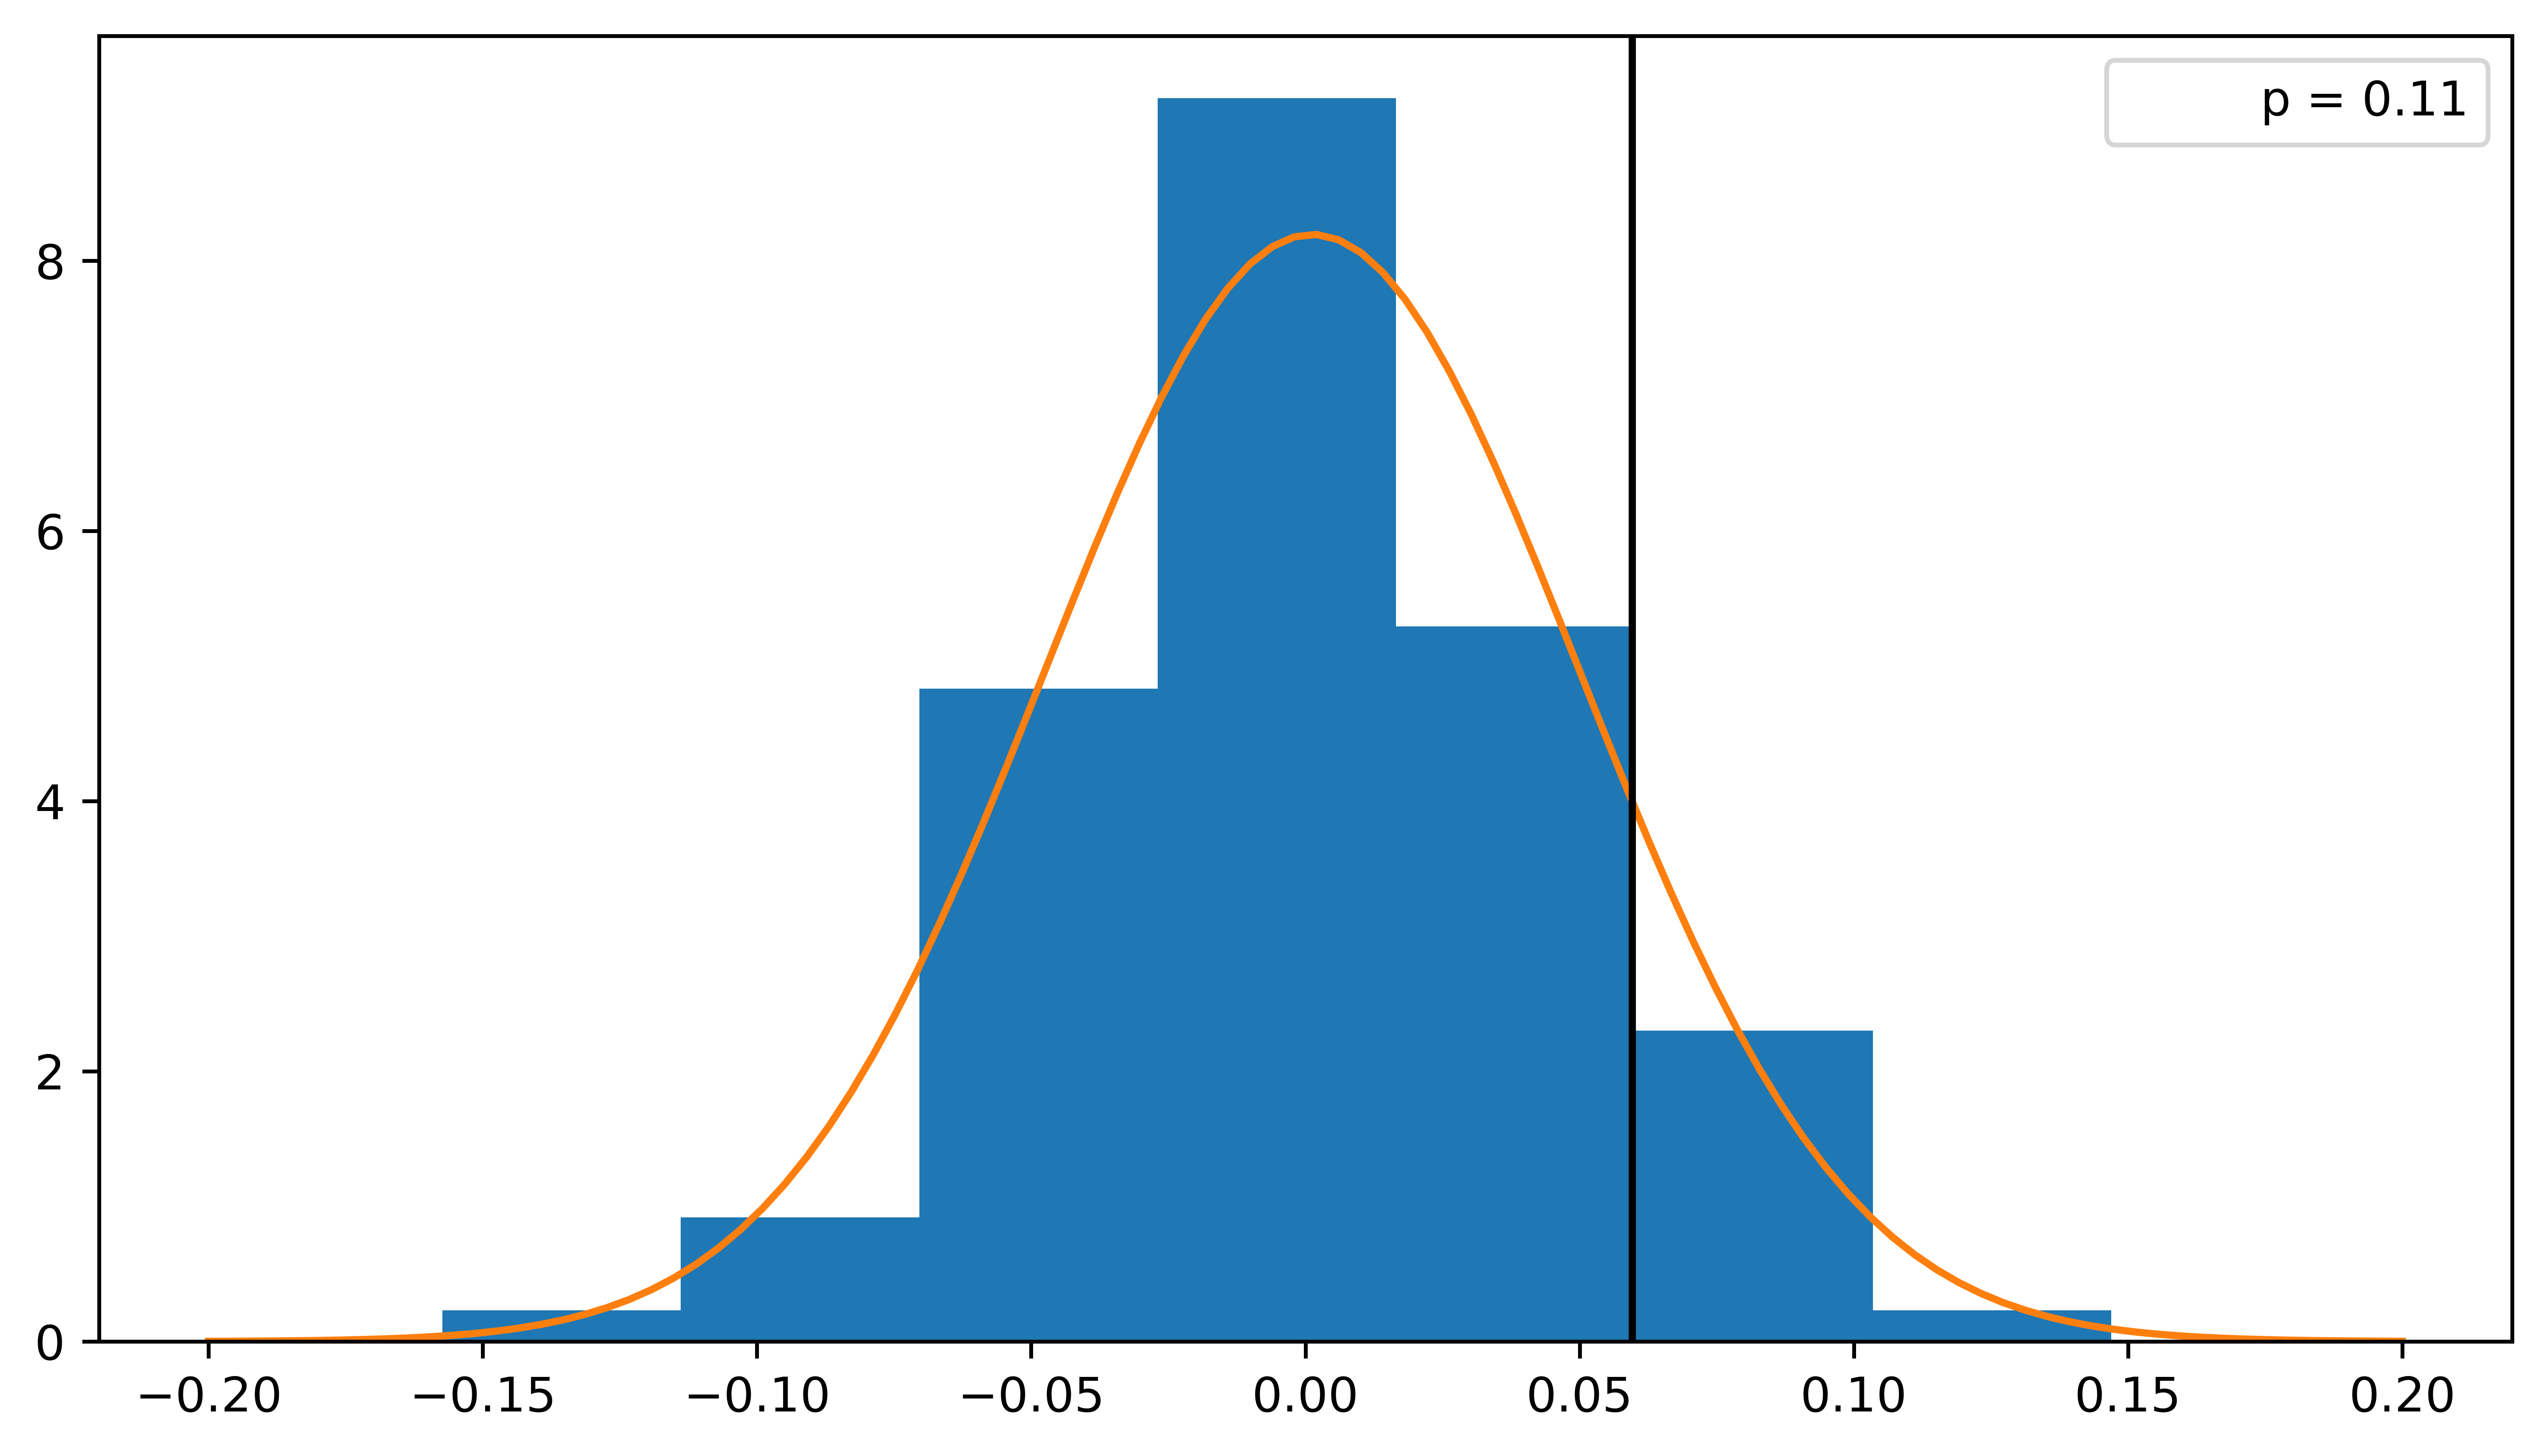

In [19]:
# plotting histogram of bootstrap sample distribution 


plt.figure(figsize=(9,5), dpi = 800)

plt.hist(bs_corr, normed=True, bins=7)

xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(xmin, xmax, len(bs_corr))

# lets try the normal distribution first
m, s = stats.norm.fit(bs_corr) # get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm") # plot it

plt.axvline(x = variation.corr(method='pearson').iloc[0,1], color = 'black') #original correlation 


# calculating p value 
p = np.sum(bs_corr > variation.corr(method='pearson').iloc[0,1])/len(bs_corr)

extra = Rectangle((0, 0), 100, 100, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra],('p = {}'.format(p),"x"))




In [64]:
np.mean(bs_corr)

0.00020250351023467318

In [70]:
np.sum(bs_corr > variation.corr(method='pearson').iloc[0,1])/len(bs_corr)

0.12

In [46]:
sprsht_inacc = data[["Q12.3", "Q18.4"]]
sprsht_inacc.corr(method='pearson')

# no significant correlation between current use of da and sim 
# no significant correlation betwen current use and issues in da 
# no signficant correlation between current use and issue in sim 
# no signigican correlation between issues in da and sim 

,Q12.3,Q18.4
Q12.3,1.000000,0.049441
Q18.4,0.049441,1.000000


## Hypothesis testing for categorical data 

## HP 5: Is frequency of use for data analytics and simulation correlated? 


In [15]:
x = data["Q10"]
y = data["Q16"]
colors = (0,0,0)
area = np.pi*3

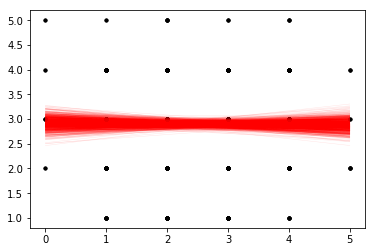

In [20]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# frequency of DA use affects frequency of SIM use 

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q10"]
y = data["Q16"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()

#### Frequency of use for data analytics and simulation not correlated. 

## HP 6: Is the usefulness of data analytics and simulation correlated for the decision-making process? 

In [28]:
Q11_means = [data["Q11.1"].mean(), 
             data["Q11.2"].mean(),
             data["Q11.3"].mean(),
             data["Q11.4"].mean(),
             data["Q11.5"].mean(),
             data["Q11.6"].mean(),
             data["Q11.7"].mean()]

In [29]:
Q11_means

[3.84375,
 2.7700892857142856,
 4.147321428571429,
 3.377232142857143,
 3.234375,
 3.8705357142857144,
 3.7299107142857144]

In [37]:
Q17_means = [data["Q17.1"].mean(), 
             data["Q17.2"].mean(),
             data["Q17.3"].mean(),
             data["Q17.4"].mean(),
             data["Q17.5"].mean(),
             data["Q17.6"].mean(),
             data["Q17.7"].mean()]

In [38]:
Q17_means

[3.2120535714285716,
 2.3059360730593608,
 3.2254464285714284,
 3.09375,
 3.002232142857143,
 3.625,
 3.3794642857142856]

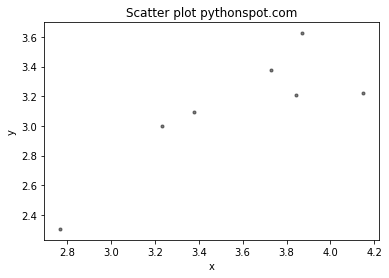

In [39]:
x = Q11_means
y = Q17_means
colors = (0,0,0)
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

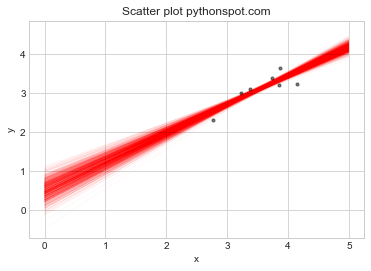

In [179]:
# plot original means

# usefulness of DA is associated with usefullness of SIM at every design step 
x = Q11_means
y = Q17_means
colors = (0,0,0)
area = np.pi*3

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')

#generate bootstrap samples for Q11 and Q17 

inds = np.arange(448)
inds

bs_slope=np.empty(1000)
bs_intercept=np.empty(1000)

for i in range(1000): 
    bs_inds = np.random.choice(inds, size=448)
    bsdata = data.iloc[bs_inds,] 
    bs_Q11_means = [bsdata["Q11.1"].mean(), 
                    bsdata["Q11.2"].mean(),
                    bsdata["Q11.3"].mean(),
                    bsdata["Q11.4"].mean(),
                    bsdata["Q11.5"].mean(),
                    bsdata["Q11.6"].mean(),
                    bsdata["Q11.7"].mean()]
    
    bs_Q17_means = [bsdata["Q17.1"].mean(), 
                    bsdata["Q17.2"].mean(),
                    bsdata["Q17.3"].mean(),
                    bsdata["Q17.4"].mean(),
                    bsdata["Q17.5"].mean(),
                    bsdata["Q17.6"].mean(),
                    bsdata["Q17.7"].mean()]
    
    # plot slope intercept lines 
    
    bs_slope[i], bs_intercept[i] = np.polyfit(bs_Q11_means, bs_Q17_means, 1)
    
    t = np.array([0,5])
    plt.plot(t, t*bs_slope[i]+bs_intercept[i], linewidth = 0.5, alpha = 0.05, color = "red")

plt.show()

## Yes, the usefulness of data analytics and simulation for the various phases of the decision-making process are correlated! 

In [168]:
bs_inds = np.random.choice(inds, size=448)
data.iloc[bs_inds,].head()

,Q2,Q3,Q4,Q5,Q6.1,Q6.2,Q6.3,Q6.4,Q6.5,Q6.6,...,Q19.1,Q19.2,Q19.3,Q19.4,Q19.5,Q19.6,Q19.7,Q19.8,Q19.9,Q19.10
85,Public,Engineer,1 to 5,Midwest,0,1,1,0,1,1.0,...,1,1,1,2,4,4,4,5,2,3
117,Private,Engineer,20+,South,0,1,1,0,1,1.0,...,1,2,3,1,1,3,3,4,1,3
86,Private,Engineer,5 to 10,South,0,0,1,0,1,1.0,...,3,2,3,2,3,1,2,3,3,3
62,Public,Engineer,5 to 10,West,1,0,1,0,0,0.0,...,1,2,2,2,3,2,3,2,3,3
195,Private,Director,20+,West,1,1,1,0,1,1.0,...,1,2,2,3,3,2,3,1,1,2


## Testing correlation of phases within the decision-making process (Q11 and Q17)

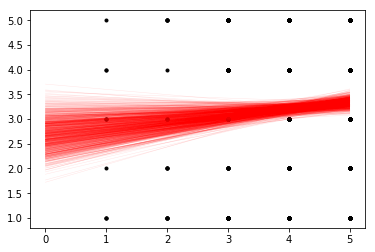

In [36]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# usefullness of gathering information 
# can test correlations of any other uses (Q11.1-11.7, Q17.1-17.7)

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q11.3"]
y = data["Q17.3"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()



#### Small correlation for individual phases within the decision-making process. 

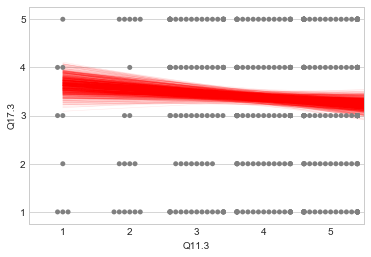

In [94]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.swarmplot(x= data["Q11.3"], y = data["Q17.3"], data= data, color = "gray")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")



## Testing correlation betweeen frequency of use of tool and usefulness of tool in decision-making process 

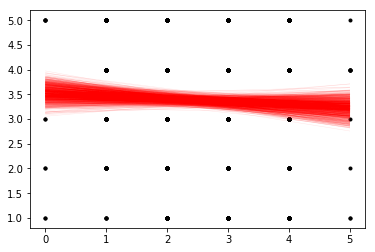

In [53]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# predicting data analytics use of "generating alternatives" from frequency of use of data analytics
# can replace design step (11.4) with any other step 

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q10"]
y = data["Q11.4"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()

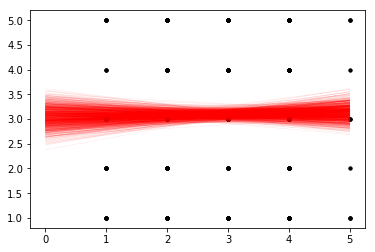

In [54]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# predicting SIM use of generating alternatives from frequency use of SIM 
# can replace design step (17.4) with any other step 

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q16"]
y = data["Q17.4"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()

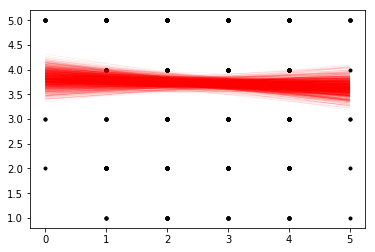

In [55]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# frequency DA to evaluating decisions

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q10"]
y = data["Q11.7"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()

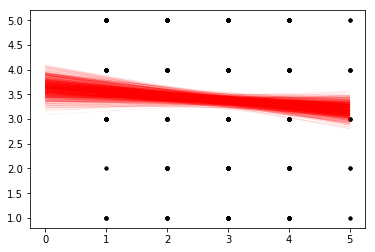

In [56]:
# Bootstrap of linear regression, generate the bootstrap slope and intercept

# frequency SIM to evaluating decisions

def draw_bs_pairs_linreg(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)
    
    return bs_slope_reps, bs_intercept_reps

# test the function by generating some random x and y

x = data["Q16"]
y = data["Q17.7"]

# Use the function to generate bootstrap replicates

bs_slope, bs_intercept = draw_bs_pairs_linreg(x, y, 1000)

# Calculate the confidence intervals for slope and intercept

slope_conf = np.percentile(bs_slope, [2.5, 97.5])
intercept_conf = np.percentile(bs_intercept, [2.5, 97.5])

# Plot the points and bootstrap slopes and intercepts
_ = plt.plot(x,y, color="black", linestyle="none", marker=".")

t = np.array([0,5])
for i in range(1000):
    _ = plt.plot(t, bs_slope[i]*t + bs_intercept[i], linewidth = 0.5, alpha = 0.1, color = "red")

plt.show()


## Correlation between frequency of use and demographic factors 

In [161]:
def draw_bs_pairs_log(x, y, size = 100):
    
    inds = np.arange(len(x))
    bs_slope_reps = []
    bs_intercept_reps = []
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        lr = LogisticRegression()
        lr.fit(bs_x, bs_y)
        bs_slope_reps.append(lr.coef_)
        bs_intercept_reps.append(lr.intercept_)
    
    return bs_slope_reps, bs_intercept_reps



In [8]:
from sklearn.linear_model import LogisticRegression

In [334]:
Q2_bin = pd.get_dummies(data["Q2"])
Q3_bin = pd.get_dummies(data["Q3"])
Q4_bin = pd.get_dummies(data["Q4"])
Q5_bin = pd.get_dummies(data["Q5"])




In [335]:
dems = pd.concat([Q2_bin, Q3_bin, Q4_bin, Q5_bin, data.loc[:,"Q6.1":"Q6.14"]], axis=1)

In [336]:
dems

,Private,Public,Director,Engineer,Manager,President,Principal,1 to 5,10 to 20,20+,...,Q6.5,Q6.6,Q6.7,Q6.8,Q6.9,Q6.10,Q6.11,Q6.12,Q6.13,Q6.14
0,0,1,0,0,1,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,1,1,1,1,1,1,0,0,1
3,0,1,1,0,0,0,0,0,1,0,...,1,1,1,1,0,0,0,1,1,1
4,1,0,0,0,0,1,0,0,1,0,...,1,1,1,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
6,0,1,0,0,1,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
7,1,0,0,1,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,0,0
8,1,0,0,1,0,0,0,0,0,0,...,1,1,0,0,1,1,1,0,0,0
9,0,1,0,0,1,0,0,0,0,0,...,1,0,1,1,1,0,0,0,0,0


In [31]:
Q10_bin = pd.get_dummies(data["Q10"])


In [349]:
x = dems.values.reshape(-1,29)
y = data["Q10"].values.reshape(-1,1)
a, b = draw_bs_pairs_log(x, y, size=100)

#[i.shape for i in a]

a

/Users/Charu/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[array([[-1.21795845, -0.02074013, -0.38980985, -0.22097136, -0.11218401,
         -0.43538677, -0.0803466 , -0.20252905, -0.26789612, -0.65218797,
         -0.11608544, -0.19079294,  0.31835075, -0.22401524, -1.14224115,
         -0.07891573,  0.05740323, -0.47943125,  0.87616848,  0.22259509,
         -0.60877272, -0.35727938,  0.38778572, -0.17052278, -1.14090588,
         -0.49871841, -0.38189656, -0.20345022,  0.06981756],
        [-0.53609922, -0.45924321,  0.40508128,  0.23581214, -0.11013338,
         -1.08982481, -0.43627765, -0.3663406 , -0.34977302,  0.01527468,
         -0.29450349, -0.16751085, -0.52492469, -0.04090059, -0.26200629,
         -0.32422219, -0.53995109, -0.62059171,  0.18432035,  0.38287934,
          0.26290211,  0.40849872,  0.78287478, -0.46354162,  0.3248065 ,
         -0.17703123, -0.1101911 ,  0.21418946,  0.05707452],
        [-0.10386999, -0.4615442 , -0.19475572,  0.01438142, -0.18490933,
          0.08880042, -0.28893098, -0.59932947,  0.18150692,  

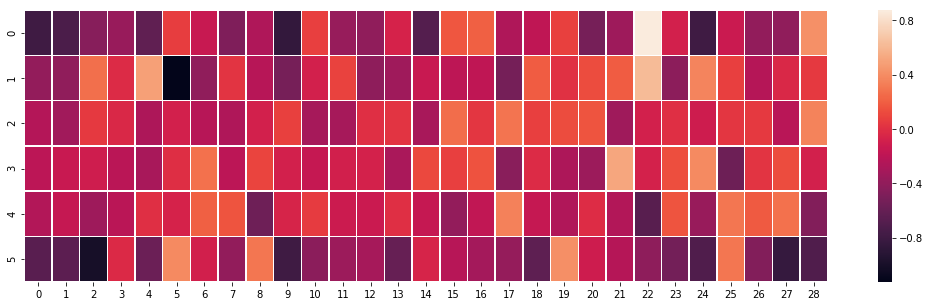

In [341]:
meancorr = np.array(a).mean(axis=0)
f,ax = plt.subplots(figsize=(18,5))
sns.heatmap(meancorr, linewidth = 0.5, ax = ax)

